In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential


# Load the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to add a channel dimension for the convolutional layers
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Check the shapes of the loaded and reshaped data
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [3]:
X_train.shape

(60000, 28, 28, 1)

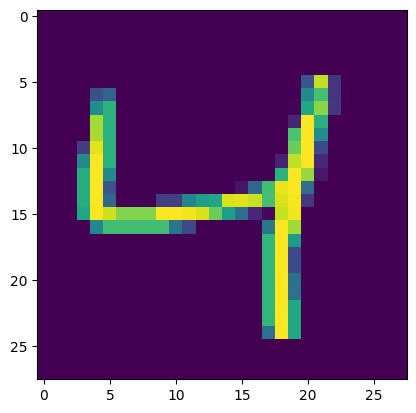

In [4]:
plt.imshow(X_train[2])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
model = Sequential()

In [7]:
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) 

c:\Users\rokig\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [10]:
history = model.fit(X_train, Y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.8013 - val_loss: 0.6864
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6314 - val_loss: 0.4467
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4492 - val_loss: 0.3714
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3753 - val_loss: 0.3351
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3492 - val_loss: 0.3154
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3284 - val_loss: 0.2989
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3164 - val_loss: 0.2876
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3057 - val_loss: 0.2782
Epoch 9/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2920 - val_loss: 0.2701
Epoch 10/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2842 - val_loss: 0.2623
Epoch 11/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2695 - val_loss: 0.2555
Epoch 12/25
1500/1500 ━━━━━━━━

In [11]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step


In [12]:
y_preb = y_prob.argmax(axis=1)

In [13]:
# from sklearn.metrics import accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_preb)
print("Accuracy:", accuracy)


Accuracy: 0.946


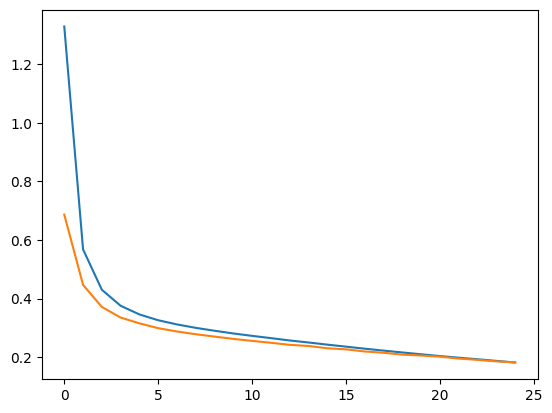

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])



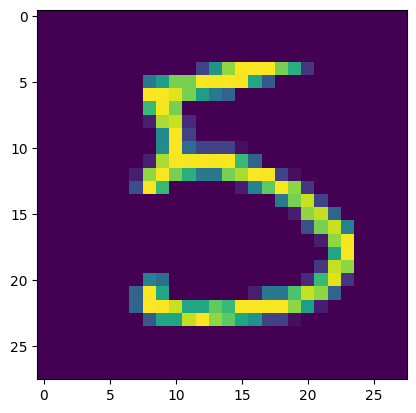

In [15]:
plt.imshow(X_test[15])

In [16]:
model.predict(X_test[15].reshape(1, 28, 28, 1)).argmax(axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([5])